<a href="https://colab.research.google.com/github/MuhammadShan7/CNN-Models/blob/main/Copy_of_Cotton_leaf_inspection_V3_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Feb 12 06:03:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install keras

In [ ]:
!pip install -U keras-tuner

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
import keras_tuner
from kerastuner.tuners import RandomSearch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
!pip install -U keras-tuner

In [ ]:
import keras_tuner

In [ ]:
print(tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

2.7.0
Default GPU Device: /device:GPU:0


In [ ]:
!pip install tensorflow

In [ ]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
train_data = train_datagenerator.flow_from_directory('/content/drive/MyDrive/Dataset/cotton1',
                                                    target_size = (256,256),
                                                    batch_size = 5,
                                                    class_mode = 'categorical')

Found 2310 images belonging to 3 classes.


In [ ]:
test_data = test_datagenerator.flow_from_directory('/content/drive/MyDrive/Dataset/cotton1/val',
                                                  target_size = (256,256),
                                                    batch_size = 5,
                                                    class_mode = 'categorical')

Found 253 images belonging to 4 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
# Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[256,256,4]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = cnn.fit(x = train_data, validation_data = test_data, epochs = 5)

In [ ]:
!pip install tensorflow-GPU

     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 50.4 MB/s 
     |████████████████████████████████| 1.4 MB 43.6 MB/s 
     |████████████████████████████████| 5.8 MB 36.4 MB/s 
     |████████████████████████████████| 15.7 MB 36.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you hav

In [ ]:
!nvidia-smi

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


In [ ]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/cotton1/train'
valid_path = '/content/drive/MyDrive/Dataset/cotton1/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/cotton1/train/*')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/cotton1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/cotton1/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
244/244 [==============================] - 586s 2s/step - loss: 2.4327 - accuracy: 0.7688 - val_loss: 2.1827 - val_accuracy: 0.8113
Epoch 2/5
244/244 [==============================] - 42s 173ms/step - loss: 1.8562 - accuracy: 0.8647 - val_loss: 0.9859 - val_accuracy: 0.8962
Epoch 3/5
244/244 [==============================] - 42s 170ms/step - loss: 1.5066 - accuracy: 0.8934 - val_loss: 1.2978 - val_accuracy: 0.8491
Epoch 4/5
244/244 [==============================] - 41s 169ms/step - loss: 1.8070 - accuracy: 0.8975 - val_loss: 2.6641 - val_accuracy: 0.8774
Epoch 5/5
244/244 [==============================] - 41s 169ms/step - loss: 1.2541 - accuracy: 0.9293 - val_loss: 3.4769 - val_accuracy: 0.8491


In [ ]:
import matplotlib.pyplot as plt

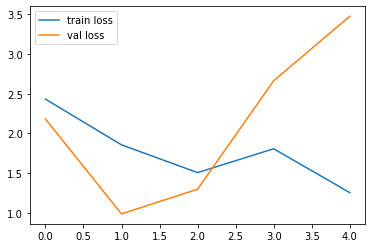

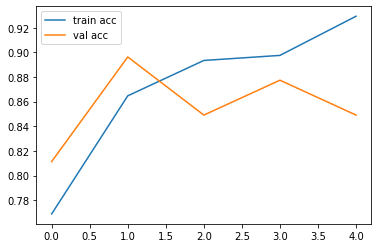

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')